### PROJECT DESCRIPTION

##CCTE Programme for Syrians and other refugees in Turkey is being implemented with the partnership of; Turkish Red Crescent  , Ministry of National Education (MoNE), Ministry of Family, Labor and Social Services and UNICEF. In May 2017, the National CCTE Programme was extended to cover school-age refugee children residing in Turkey under temporary/international protection. It was aimed to ensure that children have access to school and attend classes regularly with the cash assistance oﬀered under the programme. The cash assistance amounts vary according to gender and school levels for each month. The payments are made on a bi-monthly basis and the programme is on the condition of regular attendance, i.e. cash is not provided if the child is absent for more than four days in a school month.The CCTE program is open to refugees and persons under temporary/international protection of all nationalities. Applicants for the CCTE must be registered with the Directorate General of Migration Management (DGMM), have a foreigner’s ID number beginning with the number 99 and be registered in the MERNIS database. Applicants must meet the eligibility criteria for the CCTE program and send their children to school regularly in order to receive CCTE payments regularly. Children attending the Accelerated Learning Program (ALP) at Public Education Centers can also benefit from CCTE.



In [1]:
# Calling the required packages 

import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import plotly.graph_objects as go
from pandas.plotting import autocorrelation_plot
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.stats.stattools import jarque_bera
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import gaussian_kde, norm
import scipy
#import sys
#!{sys.executable} -m pip install statsmodels
import statsmodels
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from dateutil.relativedelta import relativedelta

In [2]:
##Sinif bilgisi  Class information
Anasinif_Ilkokul_kiz=50
Anasinif_Ilkokul_erkek=45
lise_kiz=75
lise_erkek=55
Hep_kiz=75
Hep_erkek=75
Ek_odeme_orani=0.96
Hep_ek_orani=0.99
top_up_lise=150
top_up_orta=100

In [3]:
import chart_studio
import cufflinks as cf
cf.go_offline()

In [4]:
#calling Arima package

import pmdarima as pm
from pmdarima import auto_arima

In [5]:
###Historical data 

historic = pd.read_excel(r"D:\desktop\Sey\ŞEY_Forecasting 24032021.xlsx",sheet_name="Sheet1")

In [6]:
sinif_cinsiyet=pd.read_excel(r"D:\desktop\Sey\seyforecast.xlsx",sheet_name="cinsiyet-sinif")

In [7]:
sinif_cinsiyet.head()

,AY,ANASINIFI_Kadın,ANASINIFI_Erkek,BILGI YOK_Kadın,BILGI YOK_Erkek,HEP_Kadın,HEP_Erkek,ILKOKUL_Kadın,ILKOKUL_Erkek,LISE_Kadın,LISE_Erkek,ORTAOKUL_Kadın,ORTAOKUL_Erkek,Toplam
0,201705,110,97,448,507,0,0,5360,6012,4501,3677,17916,17612,56240
1,201707,140,127,533,556,0,2,6987,7755,5692,4566,23109,22560,72027
2,201709,202,180,2142,2270,6,9,13429,14950,12092,9434,41071,40738,136523
3,201711,194,181,323,351,10,10,21233,22908,14176,10948,49100,48008,167442
4,201801,468,531,1841,1995,28,26,47068,50356,25667,20136,81907,81903,311926


In [8]:
idx = pd.date_range(start='05/2017', end='03/2021', freq='2m')
idx = pd.to_datetime(idx, format = '%m/%d/%Y').strftime('%b %Y')

In [9]:
all_fay = pd.Series((sinif_cinsiyet['Toplam'][0:24]),index = idx)

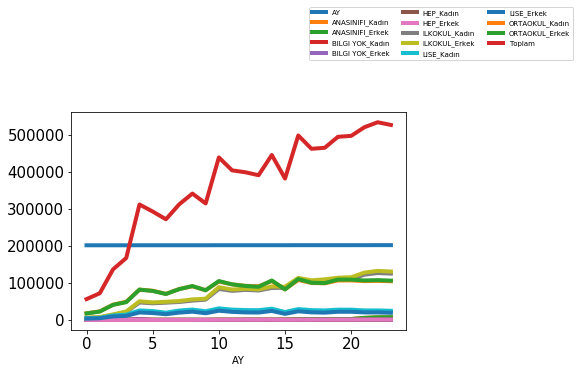

In [11]:
ax = sinif_cinsiyet.plot(fontsize=15, linewidth=3);
ax.set_xlabel('AY', fontsize=10);
ax.legend(loc='upper left', bbox_to_anchor=(0.7, 1.5), ncol=3, fontsize=7);




In [12]:
###Sinif_cinsiyet Forecasting 

Anaokul_kiz=pd.Series((sinif_cinsiyet['ANASINIFI_Kadın'][:24]),index = idx)

Anaokul_erkek=pd.Series((sinif_cinsiyet['ANASINIFI_Erkek'][:24]),index = idx)
##############################
ILKOKUL_Kadın=pd.Series((sinif_cinsiyet['ILKOKUL_Kadın'][:24]),index = idx)

ILKOKUL_Erkek=pd.Series((sinif_cinsiyet['ILKOKUL_Erkek'][:24]),index = idx)
###################
HEP_Kadın=pd.Series((sinif_cinsiyet['HEP_Kadın'][:24]),index = idx)

HEP_Kadın=pd.Series((sinif_cinsiyet['HEP_Erkek'][:24]),index = idx)

######################################
LISE_Kadın=pd.Series((sinif_cinsiyet['LISE_Kadın'][:24]),index = idx)

LISE_Erkek=pd.Series((sinif_cinsiyet['LISE_Erkek'][:24]),index = idx)

###########################################
ORTAOKUL_Kadın=pd.Series((sinif_cinsiyet['ORTAOKUL_Kadın'][:24]),index = idx)

ORTAOKUL_Erkek=pd.Series((sinif_cinsiyet['ORTAOKUL_Erkek'][:24]),index = idx)


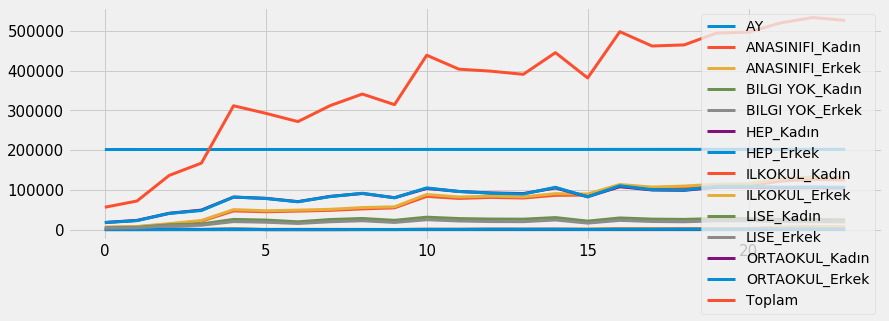

In [13]:
plt.style.use('fivethirtyeight')
ax = sinif_cinsiyet.plot(figsize=(13,4),fontsize=15, linewidth=3);
plt.show()

In [14]:
pd.concat([sinif_cinsiyet['ANASINIFI_Kadın'],sinif_cinsiyet['ANASINIFI_Erkek'],sinif_cinsiyet['ILKOKUL_Kadın'],sinif_cinsiyet['ILKOKUL_Erkek']
, sinif_cinsiyet['HEP_Kadın'], sinif_cinsiyet['HEP_Erkek'], sinif_cinsiyet['LISE_Kadın'],sinif_cinsiyet['LISE_Erkek'],
          sinif_cinsiyet['ORTAOKUL_Kadın'],sinif_cinsiyet['ORTAOKUL_Erkek']],axis=1).iplot()




# Arima models according to class 

In [15]:
##Arima 

reg = auto_arima(sinif_cinsiyet['ANASINIFI_Kadın'][0:24], start_p=0, start_q=0,
                           max_p=15, max_q=15, m=12,
                           start_P=0, seasonal=True,start_Q=0,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True,random_state=20,n_fits=50)
print(reg.aic())

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=185.196, BIC=185.992, Fit time=0.689 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=187.029, BIC=188.223, Fit time=0.061 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=186.916, BIC=188.110, Fit time=0.076 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=188.148, BIC=189.739, Fit time=0.185 seconds
Total fit time: 1.026 seconds
185.19615814535493


In [16]:
Ana_kiz_model= reg.predict(n_periods=10)
Ana_kiz_model

array([ 7786.54545455,  8321.09090909,  8888.63636364,  9765.18181818,
       11321.72727273, 11852.27272727, 12630.81818182, 13207.36363636,
       13850.90909091, 17469.45454545])

In [17]:

reg = auto_arima(sinif_cinsiyet['ANASINIFI_Erkek'][0:24], start_p=0, start_q=0,
                           max_p=10, max_q=10, m=12,
                           start_P=0, seasonal=True,start_Q=0,
                           d=2, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True,random_state=20,n_fits=50)
print(reg.aic())

Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 1, 0, 12); AIC=176.175, BIC=176.780, Fit time=0.008 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 1, 0, 12); AIC=177.045, BIC=177.952, Fit time=0.015 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 1, 0, 12); AIC=172.433, BIC=173.341, Fit time=0.071 seconds
Fit ARIMA: order=(1, 2, 2) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(1, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA:

In [18]:
Ana_erkek_model= reg.predict(n_periods=10)
Ana_erkek_model

array([ 8647.21456613,  9969.87926948, 11458.99411006, 13304.55908787,
       16034.57420291, 17875.03945517, 20032.95484466, 22099.32037138,
       24354.13603532, 29823.4018365 ])

# ILK OKUL

In [19]:

reg = auto_arima(sinif_cinsiyet['ILKOKUL_Kadın'][0:24], start_p=0, start_q=0,
                           max_p=10, max_q=10, m=12,
                           start_P=1, seasonal=True,start_Q=0,
                           d=2, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True,random_state=20,n_fits=50)
print(reg.aic())

Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 1, 0, 12); AIC=224.572, BIC=225.177, Fit time=0.000 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.020 seconds
224.57199431911084


In [20]:
ILK_Kadın_model= reg.predict(n_periods=10)
ILK_Kadın_model

array([132189., 135694., 148325., 155374., 184103., 186571., 197705.,
       210676., 221727., 244507.])

In [21]:

reg = auto_arima(sinif_cinsiyet['ILKOKUL_Erkek'][0:24], start_p=0, start_q=0,
                           max_p=10, max_q=10, m=12,
                           start_P=0, seasonal=True,start_Q=0,
                           d=2, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True,random_state=20,n_fits=50)
print(reg.aic())

Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 1, 0, 12); AIC=226.680, BIC=227.285, Fit time=0.008 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.018 seconds
226.67998089335353


In [336]:
ILK_erkek_model= reg.predict(n_periods=10)
ILK_erkek_model

array([138445.6, 142877.8, 158104.6, 165244. , 197885. , 200985.6,
       214008.8, 229751.6, 243029. , 268525. ])

# ORTA OKUL

In [284]:
reg = auto_arima(sinif_cinsiyet['ORTAOKUL_Kadın'][0:24], start_p=0, start_q=0,
                           max_p=10, max_q=10, m=12,
                           start_P=0, seasonal=True,start_Q=0,
                           d=2, D=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True,random_state=20,n_fits=50)
print(reg.aic())

Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 12); AIC=461.979, BIC=463.971, Fit time=0.043 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 0, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 0, 0, 12); AIC=450.600, BIC=453.588, Fit time=0.015 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 0, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 2, 1) seasonal_order=(0, 0, 0, 12); AIC=445.499, BIC=450.477, Fit time=0.059 seconds
Fit ARIMA: order=(2, 2, 1) seasonal_order=(1, 0, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA:

In [285]:
Orta_kiz_model= reg.predict(n_periods=10)
Orta_kiz_model

array([120170.85951086, 107783.20162404, 118104.41799692, 115031.18614673,
       116886.00219421, 111348.70657111, 118567.72935769, 106413.25646809,
       112418.21558332, 103038.01984098])

In [286]:
reg = auto_arima(sinif_cinsiyet['ORTAOKUL_Erkek'][0:24], start_p=0, start_q=0,
                           max_p=10, max_q=10, m=12,
                           start_P=0, seasonal=True,start_Q=0,
                           d=2, D=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True,random_state=20,n_fits=50)
print(reg.aic())

Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 12); AIC=465.465, BIC=467.456, Fit time=0.046 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 0, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 0, 0, 12); AIC=453.192, BIC=456.179, Fit time=0.034 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 0, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 2, 1) seasonal_order=(0, 0, 0, 12); AIC=442.096, BIC=447.075, Fit time=0.239 seconds
Fit ARIMA: order=(2, 2, 1) seasonal_order=(1, 0, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA:

In [287]:
Orta_erk_model= reg.predict(n_periods=10)
Orta_erk_model

array([104623.05443017, 101863.94720077,  98341.13475176,  94366.9667262 ,
        89732.42679596,  84499.89419919,  78685.20335588,  72258.03036297,
        65236.19601072,  57615.48049546])

# Lise

In [288]:
reg = auto_arima(sinif_cinsiyet['LISE_Kadın'][0:24], start_p=0, start_q=0,
                           max_p=10, max_q=10, m=12,
                           start_P=0, seasonal=True,start_Q=0,
                           d=0, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True,random_state=20,n_fits=50)
print(reg.aic())

Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=212.212, BIC=212.817, Fit time=0.091 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=196.099, BIC=197.006, Fit time=0.093 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 0, 12); AIC=198.673, BIC=199.884, Fit time=0.111 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA:

In [289]:
lise_kiz_model= reg.predict(n_periods=10)
lise_kiz_model

array([33125.34998619, 29324.99063208, 27863.90024468, 27366.44928472,
       31270.13741345, 22203.62634896, 30087.99924747, 27093.19355278,
       26353.56668395, 28391.56344795])

In [377]:
reg = auto_arima(sinif_cinsiyet['LISE_Erkek'][0:24], start_p=0, start_q=0,
                           max_p=10, max_q=10, m=12,
                           start_P=0, seasonal=True,start_Q=0,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True,random_state=20,n_fits=50)
print(reg.aic())

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=175.201, BIC=175.595, Fit time=0.114 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=177.208, BIC=177.800, Fit time=0.089 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=177.878, BIC=178.470, Fit time=0.057 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=176.797, BIC=177.586, Fit time=0.122 seconds
Total fit time: 0.388 seconds
175.2006369978626


In [378]:
lise_erk_model= reg.predict(n_periods=10)
lise_erk_model

array([25519.22222222, 20802.44444444, 17749.66666667, 15856.88888889,
       18491.11111111,  9055.33333333, 14373.55555556,  9974.77777778,
        7645.        ,  8431.22222222])

# HEP

In [379]:
reg = auto_arima(sinif_cinsiyet['HEP_Kadın'][0:24], start_p=0, start_q=0,
                           max_p=10, max_q=10, m=12,
                           start_P=0, seasonal=True,start_Q=0,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True,random_state=20,n_fits=50)
print(reg.aic())

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=126.599, BIC=126.993, Fit time=0.302 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=123.780, BIC=124.372, Fit time=0.058 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=125.780, BIC=126.569, Fit time=0.095 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA:

In [380]:
hep_kiz_model= reg.predict(n_periods=10)
hep_kiz_model

array([1094.38158484, 1090.94181611, 1378.92504541, 1320.21693363,
       1422.80093007,  968.25895975, 1353.71324218, 1276.1434299 ,
       1494.48011245, 1463.74001774])

In [381]:
reg = auto_arima(sinif_cinsiyet['HEP_Erkek'][0:24], start_p=0, start_q=0,
                           max_p=10, max_q=10, m=12,
                           start_P=0, seasonal=True,start_Q=0,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True,random_state=20,n_fits=50)
print(reg.aic())

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=129.508, BIC=129.903, Fit time=0.008 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=126.962, BIC=127.553, Fit time=0.187 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=127.422, BIC=128.211, Fit time=0.243 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA:

In [382]:
hep_erk_model= reg.predict(n_periods=10)
hep_erk_model

array([1274.8541108 , 1238.44044992, 1589.15316738, 1526.57516269,
       1668.13777553, 1127.7579787 , 1600.05743639, 1551.80167225,
       1758.8472686 , 1720.53133935])

# Addition of all classes

In [383]:
y_pred = Ana_kiz_model + Ana_erkek_model + ILK_Kadın_model + ILK_erkek_model + Orta_kiz_model + Orta_erk_model + lise_kiz_model 
+ lise_erk_model + hep_kiz_model+ hep_erk_model

array([27888.45791786, 23131.82671047, 20717.74487946, 18703.68098522,
       21582.04981672, 11151.35027179, 17327.32623413, 12802.72287993,
       10898.32738105, 11615.49357931])

In [384]:
Ana_ilk_kiz = Ana_kiz_model + ILK_Kadın_model
Ana_ilk_erkek = Ana_erkek_model + ILK_erkek_model

In [385]:
y_pred

array([544987.62394789, 535834.90963546, 571086.68346706, 580452.34306371,
       647232.86787926, 635336.1393017 , 671718.50498752, 681498.76439159,
       706969.02340423, 749369.92016634])

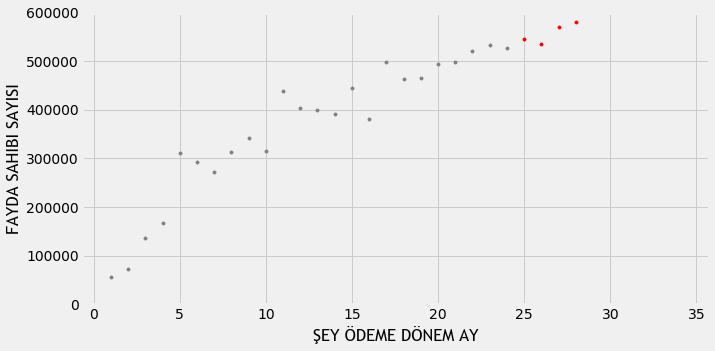

In [340]:
hfont = {'fontname':'Trebuchet MS'}

fig = plt.figure(figsize=(10,5))
plt.scatter(np.arange(len(sinif_cinsiyet.Toplam))+1, sinif_cinsiyet.Toplam,color='gray',linewidth=0.7, s = 10)
plt.scatter(np.arange(len(y_pred))+len(sinif_cinsiyet.Toplam)+1,y_pred,color='red',linewidth=0.7, s = 10)
plt.ylim(0, 600000)
plt.xlabel('ŞEY ÖDEME DÖNEM AY', **hfont)
plt.ylabel('FAYDA SAHIBI SAYISI', **hfont)
plt.show()

In [386]:
months_to_pred = pd.date_range(start='05/2021', periods = 10, freq='2m', closed = None)
months_to_pred = pd.to_datetime(months_to_pred, format = '%m/%d/%Y').strftime('%b %Y')
months_to_pred

Index(['May 2021', 'Jul 2021', 'Sep 2021', 'Nov 2021', 'Jan 2022', 'Mar 2022',
       'May 2022', 'Jul 2022', 'Sep 2022', 'Nov 2022'],
      dtype='object')

In [387]:
d = {'Months of Payment':months_to_pred,'# of Beneficiaries- Post Verification' : np.zeros(len(y_pred)),'Anasinifi_İLK OKUL_Kiz': Ana_ilk_kiz,
'Anasinifi_İLK OKUL_Erkek': Ana_ilk_erkek    }
predictions = pd.DataFrame(data = d)
predictions.index += sinif_cinsiyet.index[-1]
predictions['# of Beneficiaries- Post Verification'] = [np.ceil(i) for i in y_pred]

In [388]:
predictions['ORTA_OKUL_Kız']= Orta_kiz_model
predictions['ORTA_OKUL_Erkek']= Orta_erk_model
predictions['Lise_OKUL_Kız']= lise_kiz_model
predictions['Lise_OKUL_Erkek']= lise_erk_model
predictions['HEP_OKUL_Kız']= hep_kiz_model
predictions['HEP_OKUL_Erkek']= hep_erk_model

In [389]:
y_pred = Ana_kiz_model + Ana_erkek_model + ILK_Kadın_model + ILK_erkek_model + Orta_kiz_model + Orta_erk_model + lise_kiz_model 
+ lise_erk_model + hep_kiz_model+ hep_erk_model

array([27888.45791786, 23131.82671047, 20717.74487946, 18703.68098522,
       21582.04981672, 11151.35027179, 17327.32623413, 12802.72287993,
       10898.32738105, 11615.49357931])

In [390]:
predictions

,Months of Payment,# of Beneficiaries- Post Verification,Anasinifi_İLK OKUL_Kiz,Anasinifi_İLK OKUL_Erkek,ORTA_OKUL_Kız,ORTA_OKUL_Erkek,Lise_OKUL_Kız,Lise_OKUL_Erkek,HEP_OKUL_Kız,HEP_OKUL_Erkek
23,May 2021,544988.0,139975.545455,147092.814566,120170.859511,104623.054430,33125.349986,25519.222222,1094.381585,1274.854111
24,Jul 2021,535835.0,144015.090909,152847.679269,107783.201624,101863.947201,29324.990632,20802.444444,1090.941816,1238.440450
25,Sep 2021,571087.0,157213.636364,169563.594110,118104.417997,98341.134752,27863.900245,17749.666667,1378.925045,1589.153167
26,Nov 2021,580453.0,165139.181818,178548.559088,115031.186147,94366.966726,27366.449285,15856.888889,1320.216934,1526.575163
27,Jan 2022,647233.0,195424.727273,213919.574203,116886.002194,89732.426796,31270.137413,18491.111111,1422.800930,1668.137776
28,Mar 2022,635337.0,198423.272727,218860.639455,111348.706571,84499.894199,22203.626349,9055.333333,968.258960,1127.757979
29,May 2022,671719.0,210335.818182,234041.754845,118567.729358,78685.203356,30087.999247,14373.555556,1353.713242,1600.057436
30,Jul 2022,681499.0,223883.363636,251850.920371,106413.256468,72258.030363,27093.193553,9974.777778,1276.143430,1551.801672
31,Sep 2022,706970.0,235577.909091,267383.136035,112418.215583,65236.196011,26353.566684,7645.000000,1494.480112,1758.847269
32,Nov 2022,749370.0,261976.454545,298348.401836,103038.019841,57615.480495,28391.563448,8431.222222,1463.740018,1720.531339


In [391]:
predictions['Payment Amount for Beneficiaries (TL)'] = Anasinif_Ilkokul_kiz*predictions['Anasinifi_İLK OKUL_Kiz'] + Anasinif_Ilkokul_erkek*predictions['Anasinifi_İLK OKUL_Erkek'] + predictions['ORTA_OKUL_Kız']*Anasinif_Ilkokul_kiz + predictions['ORTA_OKUL_Erkek']*Anasinif_Ilkokul_erkek
+ predictions['Lise_OKUL_Kız']*lise_kiz + predictions['Lise_OKUL_Erkek']*lise_erkek + predictions['HEP_OKUL_Kız']*Hep_kiz + predictions['HEP_OKUL_Erkek']*Hep_erkek

23    4.065651e+06
24    3.518212e+06
25    3.288630e+06
26    3.138122e+06
27    3.594092e+06
28    2.320517e+06
29    3.268678e+06
30    2.792698e+06
31    2.640992e+06
32    2.831905e+06
dtype: float64

In [392]:
month_to_quart = predictions['Months of Payment']
month_to_quart = pd.to_datetime(month_to_quart, format = '%b %Y').dt.month
month_to_quart

23     5
24     7
25     9
26    11
27     1
28     3
29     5
30     7
31     9
32    11
Name: Months of Payment, dtype: int64

In [393]:
nn=[3,5,7]
predictions['Payment Amount for Beneficiaries (TL)']= np.array([predictions['Payment Amount for Beneficiaries (TL)']*2 if i in nn else predictions['Payment Amount for Beneficiaries (TL)'] for i in month_to_quart])


In [229]:
month_to_quart = predictions['Months of Payment']
month_to_quart

23    May 2021
24    Jul 2021
25    Sep 2021
26    Nov 2021
27    Jan 2022
28    Mar 2022
29    May 2022
30    Jul 2022
31    Sep 2022
32    Nov 2022
Name: Months of Payment, dtype: object

In [22]:
#month_to_quart = pd.to_datetime(month_to_quart, format = '%b %Y').dt.month


In [363]:
month_to_quart

23     5
24     7
25     9
26    11
27     1
28     3
29     5
30     7
31     9
32    11
Name: Months of Payment, dtype: int64

In [394]:

month_to_quart1 = (month_to_quart+3)%3
l=[1,9]
quarter1= [1 if i in l else 0 for i in month_to_quart]
quarter1

[0, 0, 1, 0, 1, 0, 0, 0, 1, 0]

In [395]:
month_to_quart2 = (month_to_quart)%5
quarter2= [1 if i==0 else 0 for i in month_to_quart2]
quarter2

[1, 0, 0, 0, 0, 0, 1, 0, 0, 0]

In [366]:
predictions.columns

Ek_odeme_orani=0.96
Hep_ek_orani=0.99
top_up_lise=150
top_up_orta=100

In [396]:
ek_odeme = quarter1*((predictions['Anasinifi_İLK OKUL_Kiz'] + predictions['Anasinifi_İLK OKUL_Erkek'] + predictions['ORTA_OKUL_Kız'] + predictions['ORTA_OKUL_Erkek']
+ predictions['Lise_OKUL_Kız'] + predictions['Lise_OKUL_Erkek'])*100*Ek_odeme_orani + (predictions['HEP_OKUL_Kız'] + predictions['HEP_OKUL_Erkek'])*100*Hep_ek_orani)

In [397]:
ek_odeme

23    0.000000e+00
24    0.000000e+00
25    5.682213e+07
26    0.000000e+00
27    6.421550e+07
28    0.000000e+00
29    0.000000e+00
30    0.000000e+00
31    6.892503e+07
32    0.000000e+00
dtype: float64

In [398]:
ek_odeme2 = (quarter2*(predictions['HEP_OKUL_Kız'] + predictions['HEP_OKUL_Erkek'])*100*Hep_ek_orani)

In [399]:
ek_odeme2

23    234554.333868
24         0.000000
25         0.000000
26         0.000000
27         0.000000
28         0.000000
29    292423.297178
30         0.000000
31         0.000000
32         0.000000
dtype: float64

In [400]:
predictions['Ek Ödeme Tutar (TL)'] = ek_odeme + ek_odeme2 

In [401]:
Topup1 = quarter1*((predictions['ORTA_OKUL_Kız'] + predictions['ORTA_OKUL_Erkek'])*top_up_orta*Ek_odeme_orani + (predictions['Lise_OKUL_Kız'] + predictions['Lise_OKUL_Erkek'])*top_up_lise*Ek_odeme_orani + (predictions['HEP_OKUL_Kız'] + predictions['HEP_OKUL_Erkek'])*top_up_lise*Hep_ek_orani)
Topup2 = quarter2*((predictions['HEP_OKUL_Kız'] + predictions['HEP_OKUL_Erkek'])*top_up_lise*Hep_ek_orani)

In [402]:
predictions['Top-Up Ödemesi (TL)']=Topup1 + Topup2

In [403]:
predictions["Toplam Tutar"]=predictions['Ek Ödeme Tutar (TL)']+predictions['Top-Up Ödemesi (TL)']+predictions['Payment Amount for Beneficiaries (TL)']

In [404]:
predictions["Toplam Tutar"][predictions.index[0]]

49255454.540878534

In [405]:
predictions.to_excel('C:/Users/fedaa.elderdesawe/desktop/Forecast CCTE(model8).xlsx') 

In [125]:
Anasinif_Ilkokul_erkek*predictions['Anasinifi_İLK OKUL_Erkek']

23    5.987596e+06
24    5.909439e+06
25    6.081058e+06
26    5.971619e+06
27    6.900143e+06
28    6.505938e+06
29    6.494692e+06
30    6.584617e+06
31    6.516823e+06
32    6.967524e+06
Name: Anasinifi_İLK OKUL_Erkek, dtype: float64

In [369]:
Eligibile_Individuals=historic['TRC Ödeme alan faydalanıcı sayısı']

In [370]:
Eligibile_Individuals.head()

Mart-Nisan         56240.0
Mayıs-Haziran      72027.0
Temmuz-Ağustos    136523.0
Eylül-Ekim        167442.0
Kasım-Aralık      311926.0
Name: TRC Ödeme alan faydalanıcı sayısı, dtype: float64

In [115]:
idx

Index(['May 2017', 'Jul 2017', 'Sep 2017', 'Nov 2017', 'Jan 2018', 'Mar 2018',
       'May 2018', 'Jul 2018', 'Sep 2018', 'Nov 2018', 'Jan 2019', 'Mar 2019',
       'May 2019', 'Jul 2019', 'Sep 2019', 'Nov 2019', 'Jan 2020', 'Mar 2020',
       'May 2020', 'Jul 2020', 'Sep 2020', 'Nov 2020'],
      dtype='object')

In [55]:
index = pd.DatetimeIndex(['01/2018', '03/2018', '05/2018', '07/2018', '09/2018', '11/2018', '01/2019', '03/2019','05/2019', '07/2019',
           '09/2019', '11/2019','01/2020', '03/2020','05/2020', '07/2020',
           '09/2020', '11/2020' ],freq='2MS')

In [43]:
index

DatetimeIndex(['2018-01-01', '2018-03-01', '2018-05-01', '2018-07-01',
               '2018-09-01', '2018-11-01', '2019-01-01', '2019-03-01',
               '2019-05-01', '2019-07-01', '2019-09-01', '2019-11-01',
               '2020-01-01', '2020-03-01', '2020-05-01', '2020-07-01',
               '2020-09-01', '2020-11-01'],
              dtype='datetime64[ns]', freq='2MS')

In [177]:
historic['TRC Ödeme alan faydalanıcı sayısı'][0:20]

0     311926.0
1     292924.0
2     272031.0
3     312287.0
4     341482.0
5     314763.0
6     439215.0
7     404160.0
8     399024.0
9     391092.0
10    445757.0
11    381993.0
12    498551.0
13    462467.0
14    465231.0
15    494899.0
16    497460.0
17    520787.0
18    534233.0
19    526897.0
Name: TRC Ödeme alan faydalanıcı sayısı, dtype: float64

In [245]:
idxn = pd.date_range(start='01/2018', end='05/2021', freq='2m')
idxn = pd.to_datetime(idxn, format = '%m/%d/%Y').strftime('%b %Y')
all_hist = pd.Series(list(historic['TRC Ödeme alan faydalanıcı sayısı'][0:20]),index = idxn)

In [246]:
idxn

Index(['Jan 2018', 'Mar 2018', 'May 2018', 'Jul 2018', 'Sep 2018', 'Nov 2018',
       'Jan 2019', 'Mar 2019', 'May 2019', 'Jul 2019', 'Sep 2019', 'Nov 2019',
       'Jan 2020', 'Mar 2020', 'May 2020', 'Jul 2020', 'Sep 2020', 'Nov 2020',
       'Jan 2021', 'Mar 2021'],
      dtype='object')

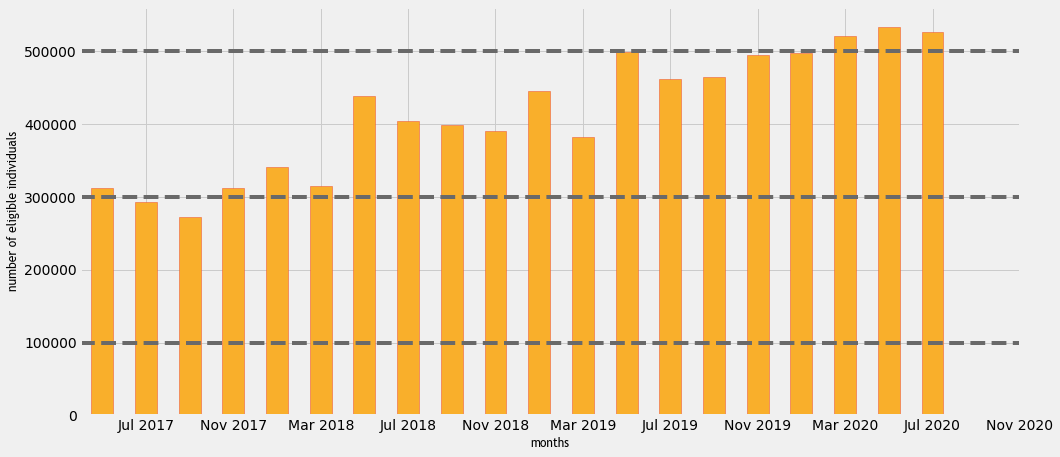

In [247]:
hfont = {'fontname':'Trebuchet MS','size'   : 12}

plt.figure(figsize=(15,7))
all_hist.plot.bar( color="#f9af2b",edgecolor="#f05131", rot = 0)
plt.xlabel('months', **hfont)
plt.axhline(y=100000, color='dimgray', linestyle='dashed')
plt.axhline(y=300000, color='dimgray', linestyle='dashed')
plt.axhline(y=500000, color='dimgray', linestyle='dashed')
plt.xticks([1,3,5,7,9,11,13,15,17,19,21], [idx[1],idx[3],idx[5],idx[7],idx[9],idx[11],idx[13],idx[15],idx[17],idx[19],idx[21]], rotation= 0)
plt.ylabel('number of eligible individuals', **hfont)
plt.savefig('all_historic_individuals.png')

In [248]:
Eligibile_Individuals = pd.to_datetime(all_hist)

In [249]:
Eligibile_Individuals.iplot(title="# of Eligibile Individuals - Post Verification")

In [250]:
predictions.head()

,Months of Payment,# of Beneficiaries- Post Verification,Anasinifi_İLK OKUL_Kiz,Anasinifi_İLK OKUL_Erkek,ORTA_OKUL_Kız,ORTA_OKUL_Erkek,Lise_OKUL_Kız,Lise_OKUL_Erkek,HEP_OKUL_Kız,HEP_OKUL_Erkek,Payment Amount for Beneficiaries (TL),Ek Ödeme Tutar (TL),Top-Up Ödemesi (TL)
23,May 2021,553842.0,139975.545455,133433.901210,122774.888889,126309.666667,31347.666667,25519.222222,1094.381585,1274.854111,2.482598e+07,2.345543e+05,3.518315e+05
24,Jul 2021,523223.0,144015.090909,131910.070442,109594.777778,112031.333333,25671.333333,20802.444444,1090.941816,1238.440450,2.365786e+07,0.000000e+00,0.000000e+00
25,Sep 2021,518144.0,157213.636364,135989.793658,100224.666667,102456.000000,22259.000000,17749.666667,1378.925045,1589.153167,2.360198e+07,5.173955e+07,2.565935e+07
26,Nov 2021,507203.0,165139.181818,134066.814360,93248.555556,94995.666667,19752.666667,15856.888889,1320.216934,1526.575163,2.322720e+07,0.000000e+00,0.000000e+00
27,Jan 2022,581639.0,195424.727273,155980.659029,101896.444444,106733.333333,21603.333333,18491.111111,1422.800930,1668.137776,2.668819e+07,5.791845e+07,2.626106e+07


In [ ]:
##ACCUTARCY


from sklearn.metrics import accuracy_score
 y_pred = predictions["# of Beneficiaries- Post Verification"]
actual_y = historic['TRC Ödeme alan faydalanıcı sayısı'][0:20]
 accuracy_score(y_true, y_pred)

 accuracy_score(y_true, y_pred, normalize=False)

# New eligibles  by Registration

In [121]:
historic.head(13)

,Aylık Başvuru Sayısı,Toplam Başvuru Sayısı,Başvuru Sayısı Değişim Yüzdesi,Ödeme Dönemi - Tarih,Başvuru Kabul Edildi Sayısı,Unnamed: 5,Yüzde,Bakanlıktan İletilen,Yüzde.1,Unnamed: 9,ORAN_b,Bakanlıktan Gelen,TRC Ödeme alan faydalanıcı sayısı,Unnamed: 13,Unnamed: 14,odeme_oran,Unnamed: 16,Unnamed: 17
Mart-Nisan,56831.0,56831.0,NaN,Mayıs,56831.0,0.967173,1.000000,56831.0,NaN,NaN,1.000000,56831.0,56240.0,NaN,NaN,0.989601,NaN,NaN
Mayıs-Haziran,72504.0,129335.0,NaN,Temmuz,129335.0,0.967173,1.000000,72504.0,0.216167,NaN,0.560591,72504.0,72027.0,NaN,NaN,0.993421,NaN,NaN
Temmuz-Ağustos,88303.0,217638.0,NaN,Eylül,168769.0,0.808934,0.775457,137868.0,0.474106,0.633474,0.816904,137868.0,136523.0,NaN,NaN,0.990244,NaN,NaN
Eylül-Ekim,96455.0,314093.0,0.307091,Kasım,281706.0,0.594386,0.896887,171144.0,0.194433,0.544883,0.607527,171144.0,167442.0,NaN,NaN,0.978369,NaN,NaN
Kasım-Aralık,41348.0,346577.0,0.093728,Ocak,322513.0,0.967173,0.930567,320559.0,0.466108,0.924929,0.993941,320559.0,311926.0,NaN,NaN,0.973069,0.973069,NaN
Ocak-Şubat,25795.0,372372.0,0.069272,Mart,344946.0,0.849188,0.926348,298499.0,-0.073903,0.801615,0.865350,298499.0,292924.0,NaN,NaN,0.981323,NaN,NaN
Mart-Nisan,13252.0,385624.0,0.034365,Mayıs,356333.0,0.763418,0.924043,277516.0,-0.075610,0.719654,0.778811,277516.0,272031.0,NaN,NaN,0.980235,NaN,NaN
Mayıs-Haziran,3480.0,389104.0,0.008944,Temmuz,357633.0,0.873205,0.919119,322139.0,0.138521,0.827899,0.900753,322139.0,312287.0,NaN,NaN,0.969417,NaN,NaN
Temmuz-Ağustos,21794.0,410898.0,0.053040,Eylül,366268.0,0.932328,0.891384,361078.0,0.107841,0.878753,0.985830,361078.0,341482.0,NaN,NaN,0.945729,NaN,NaN
Eylül-Ekim,78355.0,489253.0,0.160152,Kasım,444915.0,0.707468,0.909376,323418.0,-0.116444,0.661044,0.726921,323418.0,314763.0,NaN,NaN,0.973239,NaN,NaN


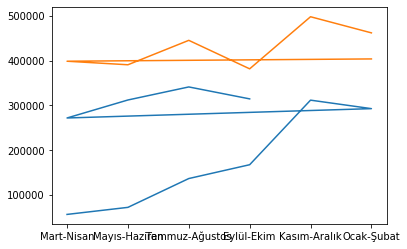

In [67]:
train=historic['TRC Ödeme alan faydalanıcı sayısı'][0:10]
test=historic['TRC Ödeme alan faydalanıcı sayısı'][11:18]

plt.plot(train)
plt.plot(test)

In [68]:
test

Ocak-Şubat        404160.0
Mart-Nisan        399024.0
Mayıs-Haziran     391092.0
Temmuz-Ağustos    445757.0
Eylül-Ekim        381993.0
Kasım-Aralık      498551.0
Ocak-Şubat        462467.0
Name: TRC Ödeme alan faydalanıcı sayısı, dtype: float64

In [70]:
train_model  = auto_arima(train, start_p=0, start_q=0,
                           max_p=10, max_q=10, m=12,
                           start_P=0, seasonal=True,start_Q=0,
                           d=1, D=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True,random_state=20,n_fits=50)
print(train_model.aic())

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=224.416, BIC=224.810, Fit time=0.090 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=226.106, BIC=226.698, Fit time=0.015 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=228.119, BIC=228.711, Fit time=0.016 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.130 seconds
224.4156954528449


In [73]:
prediction1 = pd.DataFrame(train_model.predict(n_periods=7),index=test.index)

In [74]:
prediction1.columns=['Predicted # of Applications']
prediction1

,Predicted house holds
Ocak-Şubat,343487.777778
Mart-Nisan,372212.555556
Mayıs-Haziran,400937.333333
Temmuz-Ağustos,429662.111111
Eylül-Ekim,458386.888889
Kasım-Aralık,487111.666667
Ocak-Şubat,515836.444444


C:\Users\fedaa.elderdesawe\Oracle\feda\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.



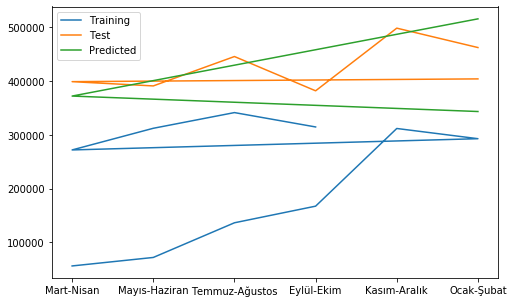

In [75]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction1,label="Predicted")
plt.legend(loc='upperleft')
plt.show()

In [76]:
pd.concat([test,prediction1],axis=1).iplot()

In [126]:
historic.head(24)

,Başvuru Dönemi - Tarih,Unnamed: 1,Unnamed: 2,ŞEY istatistik,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Ödeme dosyası,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,Aylık Başvuru Sayısı,NaN,Toplam Başvuru Sayısı,Başvuru Sayısı Değişim Yüzdesi,Ödeme Dönemi - Tarih,Başvuru Kabul Edildi Sayısı,NaN,Yüzde,Bakanlıktan İletilen,...,NaN,Bakanlıktan Gelen,TRC Ödeme alan faydalanıcı sayısı,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mart-Nisan,NaN,NaN,NaN,NaN,Mayıs,NaN,NaN,NaN,56831,...,NaN,NaN,56240,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mayıs-Haziran,NaN,NaN,NaN,NaN,Temmuz,NaN,NaN,NaN,72504,...,NaN,NaN,72027,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Temmuz-Ağustos,NaN,NaN,217638,NaN,Eylül,168769,NaN,NaN,137868,...,NaN,NaN,136523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Eylül-Ekim,NaN,NaN,314093,NaN,Kasım,281706,NaN,NaN,171144,...,NaN,NaN,167442,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Kasım-Aralık,41348,NaN,346577,0.0937281,Ocak,322513,0.967173,0.930567,320559,...,0.993941,320559,311926,NaN,NaN,0.973069,0.973069,NaN,NaN,NaN
6,Ocak-Şubat,25795,NaN,372372,0.0692721,Mart,344946,0.849188,0.926348,298499,...,0.865350,298499,292924,NaN,NaN,0.981323,NaN,NaN,NaN,NaN
7,Mart-Nisan,13252,NaN,385624,0.0343651,Mayıs,356333,0.763418,0.924043,277516,...,0.778811,277516,272031,NaN,NaN,0.980235,NaN,NaN,NaN,NaN
8,Mayıs-Haziran,3480,NaN,389104,0.00894362,Temmuz,357633,0.873205,0.919119,322139,...,0.900753,322139,312287,NaN,NaN,0.969417,NaN,NaN,NaN,NaN
9,Temmuz-Ağustos,21794,NaN,410898,0.0530399,Eylül,366268,0.932328,0.891384,361078,...,0.985830,361078,341482,NaN,NaN,0.945729,NaN,NaN,NaN,NaN


In [126]:
app_month = historic['Aylık Başvuru Sayısı'][0:22]
elig_ratio = historic['Yüzde'][0:22]
y = np.array(app_month*elig_ratio)

In [127]:
y

array([56831.        , 72504.        , 68475.21575736, 86509.25754474,
       38477.07009986, 23895.1426799 , 12245.41241209,  3198.53519882,
       19426.82804978, 71254.16670925, 19295.21790826, 14544.93546666,
        7813.52053843,  2352.42297994, 44646.17069495, 21172.46769888,
        6622.97603827,  5415.57422103,  1666.34384429, -1203.35884339,
        2071.2809971 , 30294.87404794])

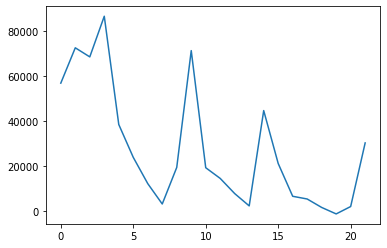

In [128]:
plt.plot(y)

In [129]:
y

array([56831.        , 72504.        , 68475.21575736, 86509.25754474,
       38477.07009986, 23895.1426799 , 12245.41241209,  3198.53519882,
       19426.82804978, 71254.16670925, 19295.21790826, 14544.93546666,
        7813.52053843,  2352.42297994, 44646.17069495, 21172.46769888,
        6622.97603827,  5415.57422103,  1666.34384429, -1203.35884339,
        2071.2809971 , 30294.87404794])

In [324]:
#reg = SARIMAX(list(y[12:]), order=(0,1,0), seasonal_order=(0,1, 0, 12), enforce_invertibility=False, enforce_stationarity=False).fit()
reg.aic

C:\Users\fedaa.elderdesawe\Oracle\feda\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



327.05415276431637

In [147]:
reg  = auto_arima(y, start_p=0, start_q=0,
                           max_p=10, max_q=10, m=12,
                           start_P=0, seasonal=True,start_Q=0,
                           d=1, D=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True,random_state=20,n_fits=50)
print(reg.aic())

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=487.755, BIC=489.844, Fit time=0.008 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=490.788, BIC=494.966, Fit time=0.028 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=489.336, BIC=492.470, Fit time=0.021 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=489.548, BIC=492.682, Fit time=0.015 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=490.061, BIC=493.195, Fit time=0.018 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.094 seconds
487.75488179134936


In [132]:
len(y)

22

In [145]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   22
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -250.945
Date:                Fri, 04 Dec 2020   AIC                            507.890
Time:                        14:41:56   BIC                            511.163
Sample:                             0   HQIC                           508.661
                                 - 22                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.043e+04   7054.699      1.479      0.139   -3392.731    2.43e+04
ar.L1          0.6184      0.159      3.900      0.000       0.308       0.929
sigma2      4.566e+08      0.208   2.19e+09      0.000    4.57e+08    4.57e+08
===================================================================================
Ljung-Box (Q):                       14.22   Jarque-Bera (JB):                 1.98
Prob(Q):                              0.86   Prob(JB):                         0.37
Heteroskedasticity (H):               0.39   Skew:                             0.68
Prob(H) (two-sided):                  0.24   Kurtosis:                         2.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.85e+24. Standard errors may be unstable.
"""

In [148]:
y_pred_new_reg = reg.predict(n_periods=10)
y_pred_new_reg

array([29031.24900261, 27767.62395727, 26503.99891193, 25240.3738666 ,
       23976.74882126, 22713.12377592, 21449.49873059, 20185.87368525,
       18922.24863992, 17658.62359458])

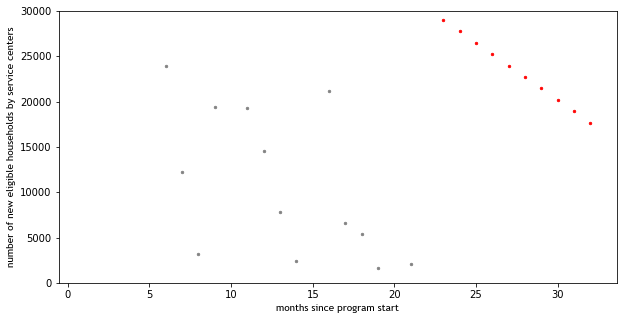

In [149]:
hfont = {'fontname':'Trebuchet MS'}

fig = plt.figure(figsize=(10,5))
plt.scatter(np.arange(len(y))+1, y,color='gray',linewidth=0.7, s = 7)
plt.scatter(np.arange(len(y_pred_new_reg))+len(y)+1, y_pred_new_reg,color='red',linewidth=0.7, s = 7)
plt.ylim(0, 30000)
plt.xlabel('months since program start', **hfont)
plt.ylabel('number of new eligible households by service centers', **hfont)
plt.show()

In [194]:
historic.head(2)

,Aylık Başvuru Sayısı,Toplam Başvuru Sayısı,Başvuru Sayısı Değişim Yüzdesi,Ödeme Dönemi - Tarih,Başvuru Kabul Edildi Sayısı,Unnamed: 5,Yüzde,Bakanlıktan İletilen,Yüzde.1,Unnamed: 9,ORAN_b,Bakanlıktan Gelen,TRC Ödeme alan faydalanıcı sayısı,Unnamed: 13,Unnamed: 14,odeme_oran,Unnamed: 16,Unnamed: 17
Mart-Nisan,56831.0,56831.0,NaN,Mayıs,56831.0,0.967173,1.0,56831.0,NaN,NaN,1.000000,56831.0,56240.0,NaN,NaN,0.989601,NaN,NaN
Mayıs-Haziran,72504.0,129335.0,NaN,Temmuz,129335.0,0.967173,1.0,72504.0,0.216167,NaN,0.560591,72504.0,72027.0,NaN,NaN,0.993421,NaN,NaN


### Bakanlık gelen

In [198]:
total_app=historic['Toplam Başvuru Sayısı'][0:22]
elig_ratio = historic['Yüzde'][0:22]
elig_app = np.array(total_app*elig_ratio)


In [371]:
bakanliksayi = np.array(historic['ORAN_b'][0:22]*elig_app)
bakanliksayi

array([ 56831.,  72504., 137868., 171144., 320559., 298499., 277516.,
       322139., 361078., 323418., 462411., 412832., 407715., 400971.,
       462325., 388535., 512060., 470361., 476842., 508468., 511237.,
       535812.])

In [372]:
y = np.array(bakanliksayi)

In [388]:
reg = auto_arima(y, start_p=1, start_q=0,
                           max_p=4, max_q=4, m=12,
                           start_P=0,start_Q=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(reg.aic())

Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=223.722, BIC=224.314, Fit time=0.078 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=221.780, BIC=222.175, Fit time=0.023 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=225.826, BIC=226.418, Fit time=0.055 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=227.734, BIC=228.523, Fit time=0.104 seconds
Total fit time: 0.279 seconds
221.78017431173214


In [389]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   22
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -108.890
Date:                            Mon, 07 Dec 2020   AIC                            221.780
Time:                                    08:42:27   BIC                            222.175
Sample:                                         0   HQIC                           220.929
                                             - 22                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.539e+04   1.48e+04     -1.040      0.298   -4.44e+04    1.36e+04
sigma2       1.89e+09   8.24e+08      2.294      0.022    2.75e+08    3.51e+09
===================================================================================
Ljung-Box (Q):                        6.70   Jarque-Bera (JB):                 0.22
Prob(Q):                              0.57   Prob(JB):                         0.90
Heteroskedasticity (H):               0.75   Skew:                            -0.32
Prob(H) (two-sided):                  0.82   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [390]:
y_pred_bakanlik = reg.predict(n_periods=10)

In [391]:
y_pred_bakanlik 

array([659417.22222222, 594450.44444444, 573945.66666667, 551813.88888889,
       597780.11111111, 508602.33333333, 616739.55555556, 559652.77777778,
       550746.        , 566984.22222222])

# TRC Ödeme alan faydalanıcı sayısı (# of Beneficiaries- Post Verification)

In [392]:

fayda = historic['TRC Ödeme alan faydalanıcı sayısı'][0:22] 
app_month = historic['Aylık Başvuru Sayısı'][0:22]
elig_ratio = 0.97
odeme_alan = y_pred_bakanlik *elig_ratio

#PARTIAL MODIFICATION - TRC to explain further why the eligible number of HH in January 2017 is 19145, if the total number of applicants in December was 85629, and the eligibility ratio was 28.8%? 
#we assume the new eligible for registration in service centers in June was 19145- 589 (eligible first month)
#new_reg[1] = historic['# of Eligibile Household - Post Verification'][1]-historic['# of Eligibile Household - Post Verification'][0]

In [397]:
y_pred_bakanlik

array([659417.22222222, 594450.44444444, 573945.66666667, 551813.88888889,
       597780.11111111, 508602.33333333, 616739.55555556, 559652.77777778,
       550746.        , 566984.22222222])

In [399]:
f = {'Months of Payment':months_to_pred,'Bakanlıktan Gelen' : y_pred_bakanlik,'TRC Ödeme alan faydalanıcı sayısı': odeme_alan}

In [400]:
predictions2 = pd.DataFrame(data = f)

In [401]:
predictions2

,Months of Payment,Bakanlıktan Gelen,TRC Ödeme alan faydalanıcı sayısı
0,Jan 2021,659417.222222,639634.705556
1,Mar 2021,594450.444444,576616.931111
2,May 2021,573945.666667,556727.296667
3,Jul 2021,551813.888889,535259.472222
4,Sep 2021,597780.111111,579846.707778
5,Nov 2021,508602.333333,493344.263333
6,Jan 2022,616739.555556,598237.368889
7,Mar 2022,559652.777778,542863.194444
8,May 2022,550746.000000,534223.620000
9,Jul 2022,566984.222222,549974.695556


In [410]:
 reg = auto_arima(fayda, start_p=0, start_q=0,start_Q=0,
                           max_p=5, max_q=5, m=12,
                           start_P=0, seasonal=True,
                           d=2, D=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(reg.aic())

Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 12); AIC=518.771, BIC=520.763, Fit time=0.024 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 0, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 0, 0, 12); AIC=506.697, BIC=509.684, Fit time=0.059 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 0, 0, 12); AIC=504.752, BIC=508.735, Fit time=0.163 seconds
Fit ARIMA: order=(2, 2, 2) seasonal_order=(0, 0, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(1, 0, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA:

In [405]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   22
Model:             SARIMAX(0, 2, 0)x(0, 1, 0, 12)   Log Likelihood                 -97.961
Date:                            Mon, 07 Dec 2020   AIC                            199.921
Time:                                    09:00:51   BIC                            200.080
Sample:                                         0   HQIC                           198.850
                                             - 22                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9220.6250    1.9e+04      0.485      0.628   -2.81e+04    4.65e+04
sigma2      2.532e+09   1.72e+09      1.474      0.141   -8.36e+08     5.9e+09
===================================================================================
Ljung-Box (Q):                        9.08   Jarque-Bera (JB):                 0.40
Prob(Q):                              0.25   Prob(JB):                         0.82
Heteroskedasticity (H):               0.58   Skew:                            -0.39
Prob(H) (two-sided):                  0.67   Kurtosis:                         2.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [411]:
fayda_predict = reg.predict(n_periods=10)

In [412]:
fayda_predict

array([520151.70788404, 530330.04484912, 528809.00045919, 530467.22870874,
       522869.02685624, 517341.00568998, 504868.05995238, 491546.04708687,
       473299.78955372, 453388.86332675])

In [446]:
predictions.to_excel('C:/Users/fedaa.elderdesawe/desktop/Forecast ESSN(model10).xlsx') 